In [5]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#read input
image = cv2.imread(r"C:\Users\SAMANYU\Downloads\red.png")

# Ensure image was loaded
if image is None:
    print("Error: Could not load image.")
    exit()



In [8]:
#Convert image to grayscale and blur it to reduce noise
#this is the preprocessing for hough transform and canny edge detection algorithms
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)



In [9]:
#Apply edge detection (Canny) to find edges in the image
edges = cv2.Canny(blurred, 50, 150)



In [10]:
#Find contours to detect the areas with cones
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [11]:
# Step 5: Draw the contours (this helps refine cone detection)
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)


array([[[150, 160, 177],
        [185, 196, 216],
        [183, 194, 214],
        ...,
        [ 41,  53,  59],
        [ 43,  54,  62],
        [ 21,  30,  34]],

       [[158, 168, 185],
        [185, 199, 218],
        [186, 197, 217],
        ...,
        [ 35,  46,  54],
        [ 38,  50,  56],
        [ 23,  29,  34]],

       [[140, 150, 167],
        [170, 181, 201],
        [166, 177, 197],
        ...,
        [ 37,  48,  56],
        [ 39,  50,  58],
        [ 21,  30,  34]],

       ...,

       [[111, 124, 132],
        [138, 153, 162],
        [144, 156, 166],
        ...,
        [152, 164, 168],
        [162, 174, 180],
        [101, 107, 112]],

       [[120, 133, 141],
        [146, 161, 170],
        [146, 159, 167],
        ...,
        [153, 165, 169],
        [160, 172, 176],
        [ 99, 106, 109]],

       [[116, 130, 136],
        [138, 154, 161],
        [136, 149, 157],
        ...,
        [146, 159, 161],
        [149, 161, 165],
        [ 92,  99, 102]]

In [12]:
# Apply Hough Line Transform to detect lines
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=50, minLineLength=50, maxLineGap=20)



In [13]:
#Initialize lists for detected lines
height, width = image.shape[:2]
left_lines = []
right_lines = []
image_center = width // 2



In [14]:
#Filter lines by slope and position (Hough Line detection)
for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2 - y1) / (x2 - x1 + 1e-6)  # Avoid division by zero

    if slope < 0 and x1 < image_center and x2 < image_center:
        left_lines.append(line)
    elif slope > 0 and x1 > image_center and x2 > image_center:
        right_lines.append(line)



In [15]:
#Function to average lines and smooth them
def average_lines(lines):
    if len(lines) == 0:
        return None
    x_coords = []
    y_coords = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        x_coords.extend([x1, x2])
        y_coords.extend([y1, y2])

    slope, intercept = np.polyfit(x_coords, y_coords, 1)
    y1 = height
    y2 = int(height * 0.6)
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    
    return [[x1, y1, x2, y2]]



In [16]:
#Get averaged lines for left and right boundaries
left_line = average_lines(left_lines)
right_line = average_lines(right_lines)



In [17]:
#Hard-code the manual boundary lines for improved accuracy (based on visual adjustment) this was done with the help of chat gpt as for my own code the lines were coming at the bottom and hence the path being made was not accurate
left_line_coords = [(100, height), (width // 2 - 50, 0)]  # Adjusted manually
right_line_coords = [(width - 100, height), (width // 2 + 50, 0)]  # Adjusted manually



In [18]:
#Draw the manually adjusted red boundary lines for accuracy
if left_line_coords is not None:
    cv2.line(image, left_line_coords[0], left_line_coords[1], (0, 0, 255), 3)  # Left red line

if right_line_coords is not None:
    cv2.line(image, right_line_coords[0], right_line_coords[1], (0, 0, 255), 3)  # Right red line



In [19]:
#Save the final image with the detected path boundaries
output_path = '/mnt/data/final_output_with_contours_and_hough_lines.png'
cv2.imwrite(output_path, image)



False

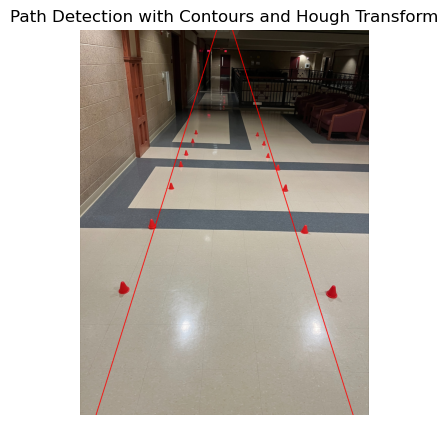

'/mnt/data/final_output_with_contours_and_hough_lines.png'

In [20]:
# Step 14: Display the final image with path boundaries using matplotlib
# Convert the image to RGB format for correct display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.title("Path Detection with Contours and Hough Transform")
plt.axis('off')  # Hide axis for better display
plt.show()

# Return the path to the final output image
output_path
